58.889696481841
data_length 1264318


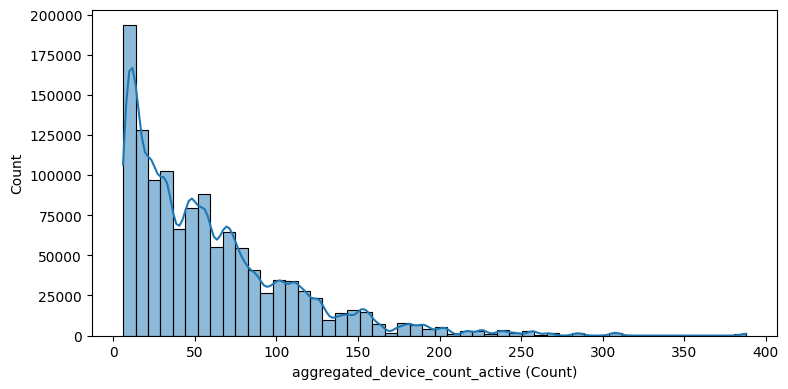

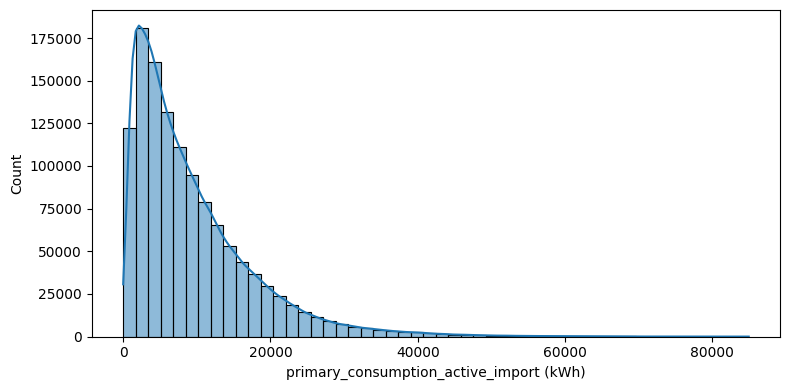

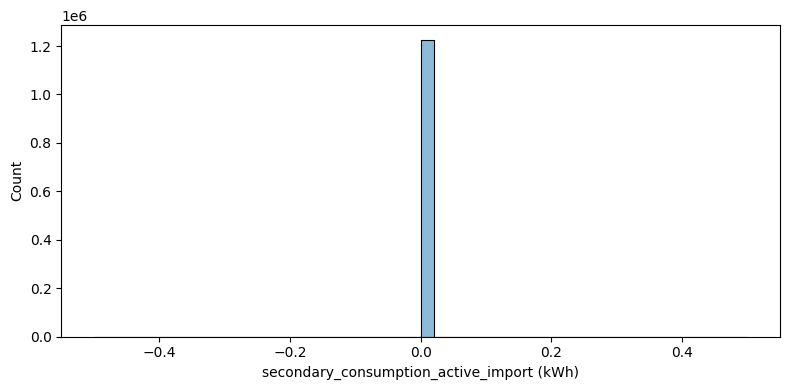

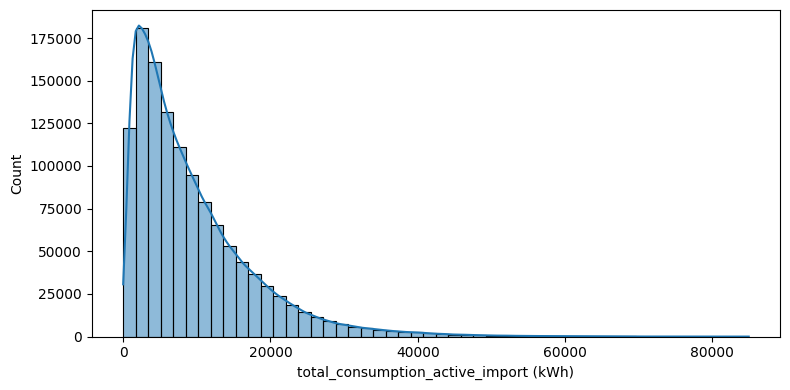

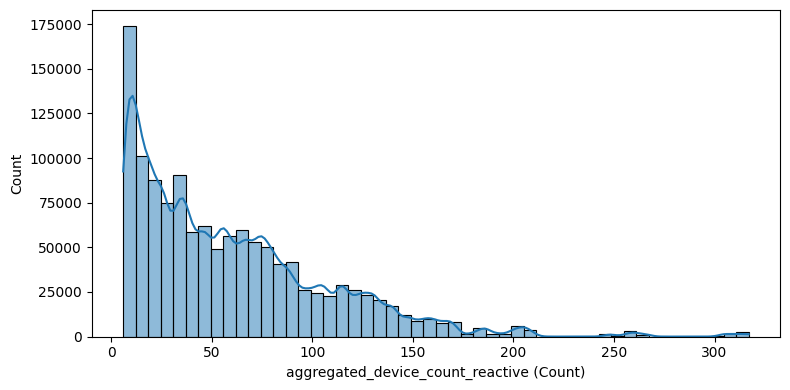

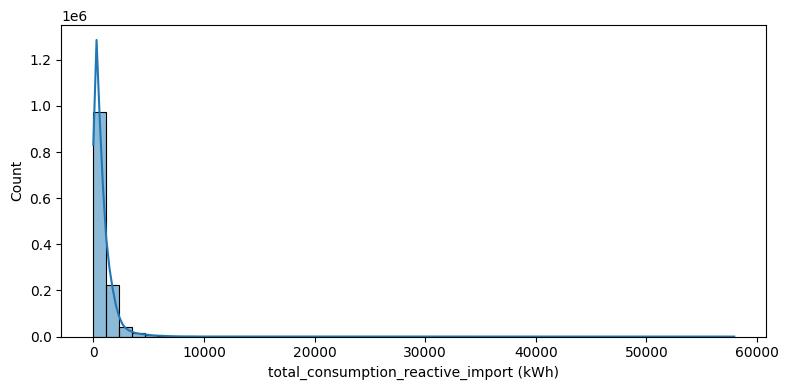

In [2]:
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

cwd = os.getcwd()

file_name = "//ukpn-smart-meter-consumption-substation.csv"

file_path = cwd + file_name

# read into pandas 

csv_read = pd.read_csv(file_path)

df = pd.DataFrame(csv_read)

corr_matrix = df.corr(numeric_only=True)

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

print(df['aggregated_device_count_active'].mean())
print(f"data_length {len(df['data_collection_log_timestamp'])}")
df['data_collection_log_timestamp'] = pd.to_datetime(df['data_collection_log_timestamp'], errors = 'coerce')
df = df.set_index('data_collection_log_timestamp')
numeric_cols = [
    "aggregated_device_count_active",
    "primary_consumption_active_import",
    "secondary_consumption_active_import",
    "total_consumption_active_import",
    "aggregated_device_count_reactive",
    "total_consumption_reactive_import"
]

# Define units for each column

units = {
    "aggregated_device_count_active": "Count",
    "primary_consumption_active_import": "kWh",
    "secondary_consumption_active_import": "kWh",
    "total_consumption_active_import": "kWh",
    "aggregated_device_count_reactive": "Count",
    "total_consumption_reactive_import": "kWh"
}

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.xlabel(f"{col} ({units[col]})")  # Add unit to label
    plt.tight_layout()
    plt.show()



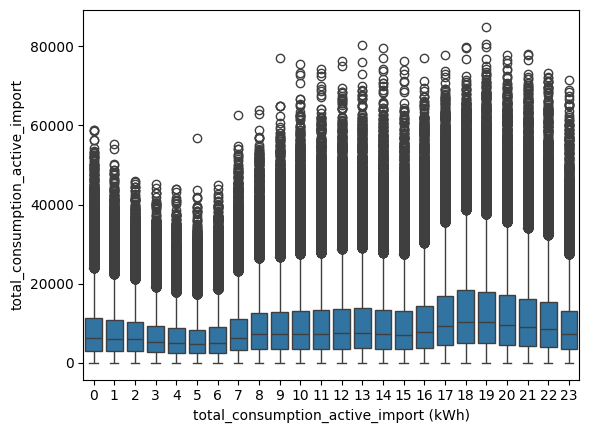

In [3]:
df['hour'] = df.index.hour

# reset index as sns does not require index

df = df.reset_index()
sns.boxplot(x='hour', y='total_consumption_active_import', data = df)
plt.xlabel('total_consumption_active_import (kWh)')
plt.show()

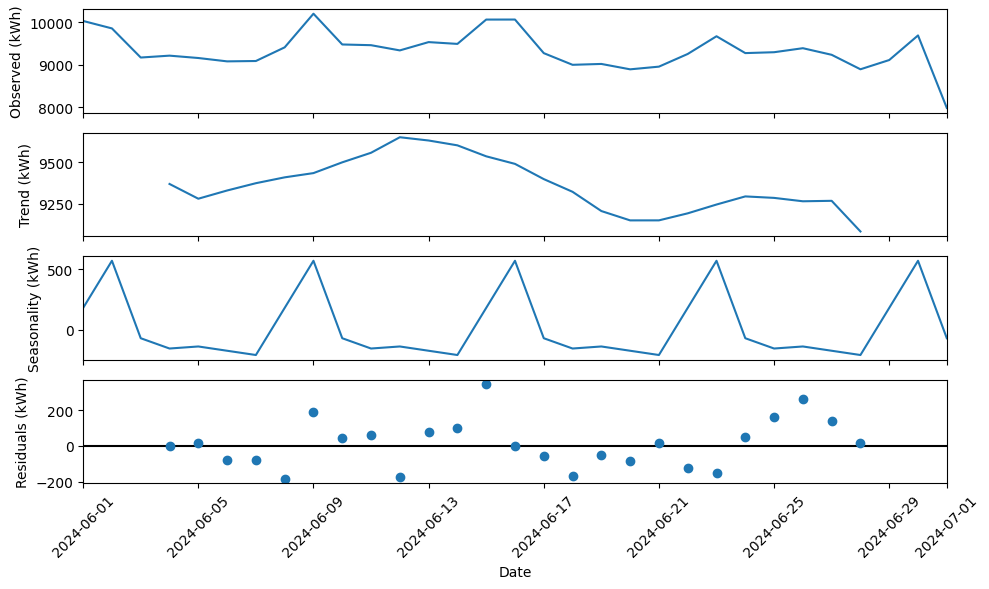

In [4]:

# Index and resample

df = df.set_index('data_collection_log_timestamp')
ts = df['total_consumption_active_import'].resample('D').mean()

# Decompose (weekly seasonality)

result = seasonal_decompose(ts, model='additive', period=7)

# Plot and format

fig = result.plot()
fig.set_size_inches(10, 6)

axes = fig.axes  # [Observed, Trend, Seasonal, Residual]

ylabels = ["Observed (kWh)", "Trend (kWh)", "Seasonality (kWh)", "Residuals (kWh)"]

for i, ax in enumerate(axes):
    ax.set_title("")                 # remove default small titles
    ax.set_ylabel(ylabels[i])
    ax.tick_params(axis='x', labelrotation=45)
    if i == len(axes) - 1:
        ax.set_xlabel("Date")
    else:
        ax.set_xlabel("")

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

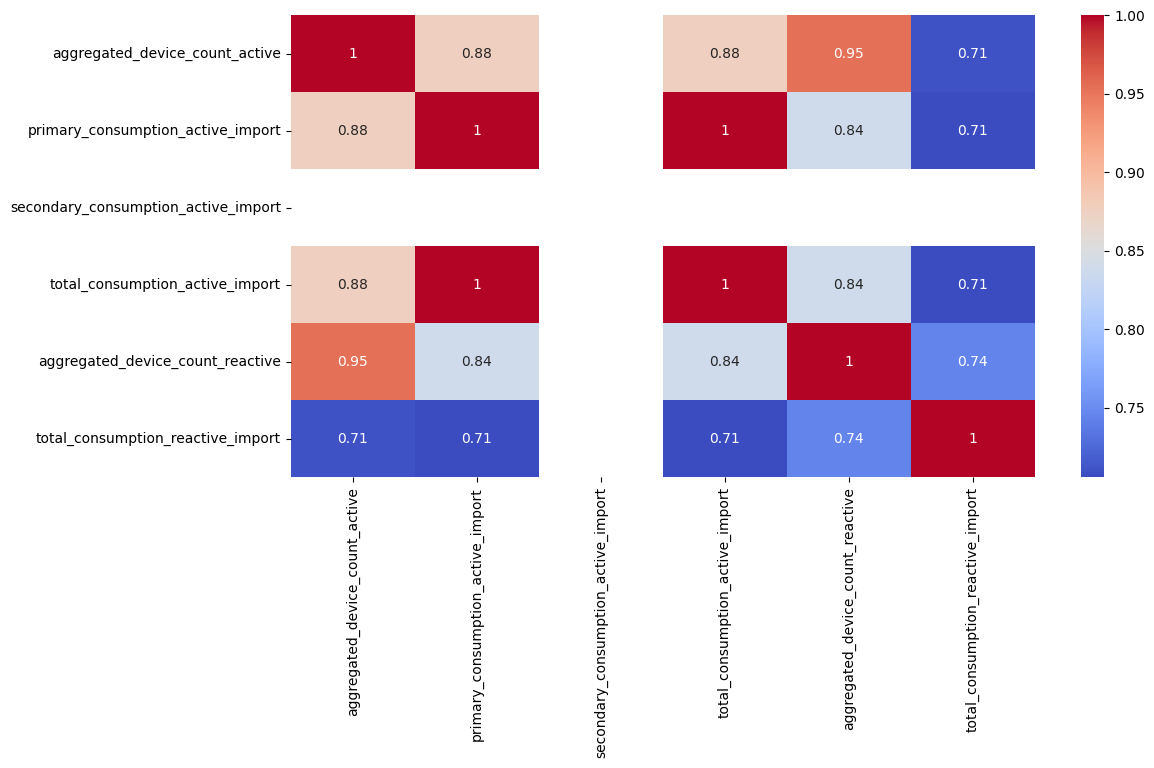

In [5]:
df = df.reset_index()
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show

Text(0, 0.5, 'kWh')

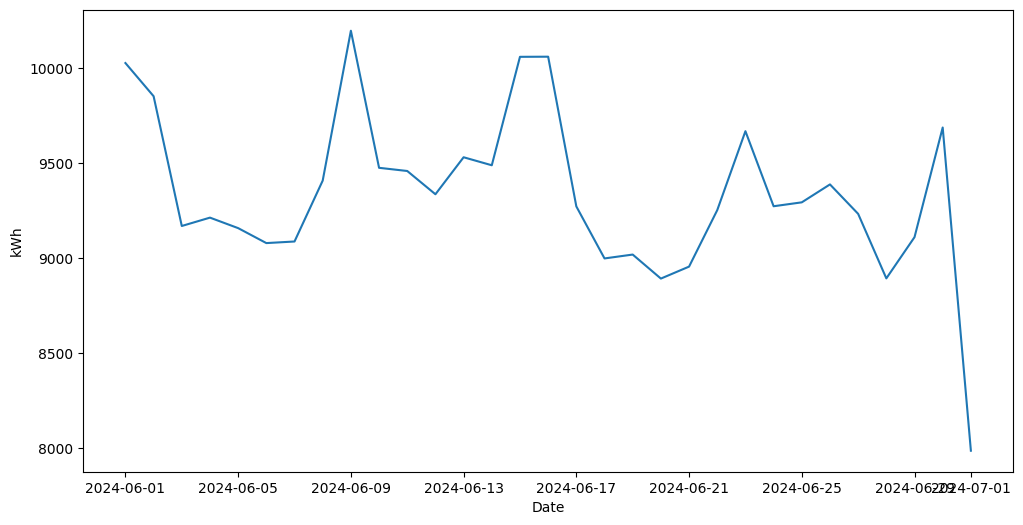

In [6]:
df = df.set_index(df['data_collection_log_timestamp'])
df_daily = df[numeric_cols].resample('D').mean()
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily['total_consumption_active_import'])
plt.xlabel('Date')
plt.ylabel('kWh')